In [1]:
import matplotlib.pyplot as plt
from functions.import_dataset import *
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
x_train, y_train, x_test, y_test = imp_dataset("dataset/voice.csv")

c:\Users\abhin\OneDrive - UT Arlington\Study stuff\Coading\ML\Gender_recognisition_voice\functions\import_dataset.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_voice["label"] = df_voice["label"].replace("female", 1)


In [3]:
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knn.fit(x_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=3)

In [4]:
knn_p_test = knn.predict(x_test)
knn_acc = accuracy_score(y_test, knn_p_test)
print("KNN accuracy: ", knn_acc)
print("KNN classification report: \n", classification_report(y_test, knn_p_test))

KNN accuracy:  0.9731437598736177
KNN classification report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       314
           1       0.98      0.96      0.97       319

    accuracy                           0.97       633
   macro avg       0.97      0.97      0.97       633
weighted avg       0.97      0.97      0.97       633



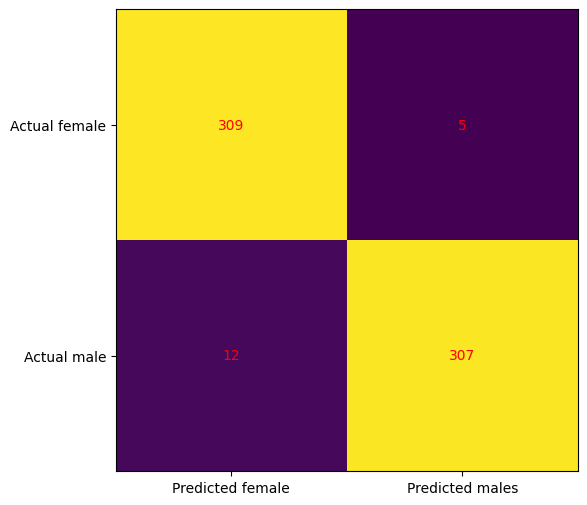

In [5]:
cm = confusion_matrix(y_test, knn.predict(x_test))

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted female', 'Predicted males'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual female', 'Actual male'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()